# Importando dados e fazendo perguntas

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('titanic_data.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Perguntas que serão respondidas

### Respondendo a primeira pergunta

In [4]:
#Testando relações da primeira pergunta
df_question1= df.groupby('Sex')['Age']

In [5]:
# Média de idades de idades de homens e mulheres que estavam no titanic, feito por agrupamento(Sem retirar valores Nan)
df_question1.mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [6]:
# Testando valores sem valores nan
df_non_na = df.dropna()

In [7]:
#A média de idade dos passegeiros que possuem todos os valores preenchidos dividos 
df_non_na.groupby('Sex')['Age'].mean()

Sex
female    32.676136
male      38.451789
Name: Age, dtype: float64

In [8]:
#Vamos testar a faixa etária de sobrevivência dos passageiros com todos os dados preenchidos
df_non_na.groupby('Survived')['Age'].mean()

Survived
0    41.350000
1    32.905854
Name: Age, dtype: float64

# Assim pode-se ter uma percepção de pessoas com a faixa etária de 32 anos tiveram mais chances de sobrevivência do que as mais velhas. Deste modo responde-se  primeira questão levantada.

### Respondendo a segunda pergunta

In [9]:
# Dado o conjunto original vamos observar pelo ângulo de sobrevivência por local

In [10]:
#Testando se existe valor Nan na coluna sobrevivência e em locais
def test_na_value(df,name):    
    tf_survived = df[name].isna()
    t=0
    for i in tf_survived:
        if i == True:
            t +=1
    return (t,name)

In [11]:
var_1 = test_na_value(df,'Survived')
var_2 = test_na_value(df,'Embarked')
print('Valores Nan : {} | Coluna: {}' .format(var_1[0],var_1[1]))
print('Valores Nan : {} | Coluna: {}' .format(var_2[0],var_2[1]))

Valores Nan : 0 | Coluna: Survived
Valores Nan : 2 | Coluna: Embarked


In [12]:
# Extraindo valores nan da coluna Embarked
df_test2 = df
df_question2 = df_test2.dropna(subset=['Embarked'])

In [49]:
# Descrição dos dados das pessoas com base nos locais de embarque
prop_survive = df_question2.groupby('Embarked')['Survived'].describe()
prop_survive

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,168.0,0.553571,0.498608,0.0,0.0,1.0,1.0,1.0
Q,77.0,0.389610,0.490860,0.0,0.0,0.0,1.0,1.0
S,644.0,0.336957,0.473037,0.0,0.0,0.0,1.0,1.0


In [50]:
# Calculando a quantidade de pessoas que sobrevivem em cada uma das cidades
group_survive = prop_survive['count']*prop_survive['mean'] # Pois cada pessoa tem peso 0 ou 1
print('A quatidade de sobreviventes é:', group_survive.sum())
group_survive

A quatidade de sobreviventes é: 340.0


Embarked
C     93.0
Q     30.0
S    217.0
dtype: float64

### Constata-se que o número de de passageiros de S sobreviveu em maior proporção dos que os de Q e C.

In [51]:
group_survive.sum()/len(df_question2)

0.38245219347581555

### É possível ver também a proporção de sobrevivência em relação ao todo como sendo cerca de 0,3825 %

## Desta parte pode surgir uma pergunta:" Será que o local tem influência na sobrevivência?"
### Para respondê-la usarei o critério da classe do passageiro e o em qual cidade ele embarcou. Assim, pode-se      ver se a classe junto ao local onde o passageiro embarcou teve alguma influência na sobrevivência ou não.

In [69]:
# Tomando o conjunto df_question2 vejamos as relação de classes junto aos tipo de locais
pclass = df_question2.groupby('Embarked')['Pclass']
print(pclass.describe())

          count      mean       std  min  25%  50%  75%  max
Embarked                                                    
C         168.0  1.886905  0.944100  1.0  1.0  1.0  3.0  3.0
Q          77.0  2.909091  0.369274  1.0  3.0  3.0  3.0  3.0
S         644.0  2.350932  0.789402  1.0  2.0  3.0  3.0  3.0


In [74]:
# Separando os valores de passageiros por locais num array
array_class = list(pclass)
array_class

[('C',
  1      1
  9      2
  19     3
  26     3
  30     1
        ..
  866    2
  874    2
  875    3
  879    1
  889    1
  Name: Pclass, Length: 168, dtype: int64),
 ('Q',
  5      3
  16     3
  22     3
  28     3
  32     3
        ..
  790    3
  825    3
  828    3
  885    3
  890    3
  Name: Pclass, Length: 77, dtype: int64),
 ('S',
  0      3
  2      3
  3      1
  4      3
  6      1
        ..
  883    2
  884    3
  886    2
  887    1
  888    3
  Name: Pclass, Length: 644, dtype: int64)]

In [75]:
# Função para contar número de classes por para cada local, para divir as proporções de classes
def count(lista):
    prop = list(lista)
    return (prop.count(1),prop.count(2),prop.count(3))

In [76]:
# Imprimindo as proporções das classes no navio
print('C :', count(array_class[0][1]))
print('Q: ', count(array_class[1][1]))
print('S :', count(array_class[2][1]))

C : (85, 17, 66)
Q:  (2, 3, 72)
S : (127, 164, 353)


### Percebendo estas proporções é válido analisar as proporções em relação ao número de sobreviventes e suas respectivas classes

In [20]:
# Número de classes dos sobreviventes por classes
# Primeiro transforma-se em um dataframe as proporções de passageiros
pclass_prop = pd.DataFrame({'C' : [85, 17, 66],
                            'Q':  [2, 3, 72],
                            'S' : [127, 164, 353]},
                              index=[1,2,3])
pclass_prop

,C,Q,S
1,85,2,127
2,17,3,164
3,66,72,353


In [78]:
#Separando o grupo dos sobreviventes assossiando por lista junta a tuplas
a2 = list(df_question2.groupby('Survived')['Pclass','PassengerId'])
a2

<ipython-input-78-4b38b8b4f31c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a2 = list(df_question2.groupby('Survived')['Pclass','PassengerId'])


[(0,
       PassengerId  Survived  Pclass                                      Name  \
  0              1         0       3                   Braund, Mr. Owen Harris   
  4              5         0       3                  Allen, Mr. William Henry   
  5              6         0       3                          Moran, Mr. James   
  6              7         0       1                   McCarthy, Mr. Timothy J   
  7              8         0       3            Palsson, Master. Gosta Leonard   
  ..           ...       ...     ...                                       ...   
  884          885         0       3                    Sutehall, Mr. Henry Jr   
  885          886         0       3      Rice, Mrs. William (Margaret Norton)   
  886          887         0       2                     Montvila, Rev. Juozas   
  888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
  890          891         0       3                       Dooley, Mr. Patrick   
  
        

In [22]:
# Tabela de passaegeitos sobreviventes e suas respesctivas classes
df_survive = a2[1][1]

In [23]:
# Filtrando passageiros embarcados nos locais C, S, Q por classes
embarked = list(df_survive.groupby('Embarked')['Pclass'])
embarked

[('C',
  1      1
  9      2
  19     3
  31     1
  36     3
        ..
  866    2
  874    2
  875    3
  879    1
  889    1
  Name: Pclass, Length: 93, dtype: int64),
 ('Q',
  22     3
  28     3
  32     3
  44     3
  47     3
  82     3
  109    3
  156    3
  186    3
  198    3
  208    3
  241    3
  274    3
  289    3
  300    3
  301    3
  303    2
  322    2
  330    3
  358    3
  359    3
  368    3
  412    1
  510    3
  573    3
  612    3
  653    3
  697    3
  727    3
  828    3
  Name: Pclass, dtype: int64),
 ('S',
  2      3
  3      1
  8      3
  10     3
  11     1
        ..
  865    2
  869    3
  871    1
  880    2
  887    1
  Name: Pclass, Length: 217, dtype: int64)]

In [24]:
# Número de sobrevivência das classes 1, 2 e 3 respectivamente em relação aos locais de embarque
print('C:',list(count(embarked[0][1])))
print('Q:',list(count(embarked[1][1])))
print('S:',list(count(embarked[2][1])))

C: [59, 9, 25]
Q: [1, 2, 27]
S: [74, 76, 67]


In [83]:
# Proporções de sobrevivência ( Os valores que estõ dividindo foram posto pela função group_survive)
print( '........1 .....|... 2 ......| 3......')
print('C:',np.array(count(embarked[0][1]))/93)
print('Q:',np.array(count(embarked[1][1]))/30)
print('S:',np.array(count(embarked[2][1]))/217)

........1 .....|... 2 ......| 3......
C: [0.6344086  0.09677419 0.2688172 ]
Q: [0.03333333 0.06666667 0.9       ]
S: [0.34101382 0.35023041 0.30875576]


## Pode-se então concluir que dado o conjunto analisado:
## O grupo C possui uma taxa de sobrevivência maior na classe 1
## O grupo Q possui uma taxa de sobrevivência maior na classe 3
## O grupo S possui uma taxa de sobrevivência maior na classe 2(apesar de haver uma distribuição quase igualitárias nas taxas de sobrevivência de S)

## Deste modo, apesar de haver uma relação entre os locais de embarque e as classes que sobreviverão, não é possível afirmar, que possa existir uma correlação forte entre tais variáveis analisadas.

## Isso nos induz a terceira pergunta: Qual as pessoas que possuem mais chances de sobrevivência?

## Respondendo a terceira pergunta

### Dado o que possuímos, é valido pensarmos se a idade e o sexo do indivíduo o influencia na chance de ele ter sobrevivido.

In [26]:
# Para iniciar a análise, pegemos o conjunto dos sobreviventes: df_survive
df_survive

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [27]:
# Verifiquems se a coluna idade e sexo possuem valores nan
print(test_na_value(df_survive,'Sex'))
print(test_na_value(df_survive,'Age'))

(0, 'Sex')
(52, 'Age')


In [28]:
# Retiremos os Nan da coluna Age
df_survive_3 = df_survive.dropna(subset=['Age'])

In [29]:
len(df_survive_3)

288

## Nesse ponto, podemos observar que existem 52 valores missing, o que chega a ser cerca de 15% dos valores do conjunto total, se retirarmos tais valores, análise será mais imprecisa, pois não considerará os valores em sua totatilidade, por isso, o que será feito é uma substituição dos valores missing pelas média de valores das idades dos indivíduos do conjunto todo.

In [30]:
df_survive.columns # Observe que o Age possui índice 6

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [111]:
# Para aplicar tal recurso, será usado a biblioteca sckilearn para gerar um conjunto de valores com as médias
# subtituindo os valores missing da tabela original
up_survive = df.iloc[:, 4:6].values# coluna das idades
up_survive # A coluna é dupla pois é necesário que haja duas colunas para que a função de substituição funcione

array([['male', 22.0],
       ['female', 38.0],
       ['female', 26.0],
       ...,
       ['female', nan],
       ['male', 26.0],
       ['male', 32.0]], dtype=object)

In [112]:
from sklearn.impute import SimpleImputer
imputer =  SimpleImputer(missing_values = np.nan,strategy='mean')

In [113]:
imputer.fit(up_survive[:,1::1]) # Para adequar ao formato da função fit, por isso o intervalo é 1::1

SimpleImputer()

In [114]:
up_survive = imputer.transform(up_survive[:,1::1])

In [115]:
print(df_survive['Age'].mean()) # Para comparar com a média do conjunto original

28.19329861111113


In [116]:
up_survive # Valores nan substituídos pela média dos valores

array([[22.        ],
       [38.        ],
       [26.        ],
       [35.        ],
       [35.        ],
       [29.69911765],
       [54.        ],
       [ 2.        ],
       [27.        ],
       [14.        ],
       [ 4.        ],
       [58.        ],
       [20.        ],
       [39.        ],
       [14.        ],
       [55.        ],
       [ 2.        ],
       [29.69911765],
       [31.        ],
       [29.69911765],
       [35.        ],
       [34.        ],
       [15.        ],
       [28.        ],
       [ 8.        ],
       [38.        ],
       [29.69911765],
       [19.        ],
       [29.69911765],
       [29.69911765],
       [40.        ],
       [29.69911765],
       [29.69911765],
       [66.        ],
       [28.        ],
       [42.        ],
       [29.69911765],
       [21.        ],
       [18.        ],
       [14.        ],
       [40.        ],
       [27.        ],
       [29.69911765],
       [ 3.        ],
       [19.        ],
       [29

In [37]:
# Substituição do dataframe
df_survive['Age'] = up_survive

In [38]:
df_survive

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [90]:
# Observando as quantidades de homens e mulheres
f = len(df_survive[df_survive['Sex']=='female'])
m = len(df_survive) -f
proportion = [f,m]

In [91]:
proportion

[231, 109]

## Observe que existem muito mais mulheres que sobreviveram do que homens

In [44]:
# Analisando o conjunto de mulheres no todo
total_persons = df['Sex']
x1_total = total_persons[total_persons == 'female']

In [45]:
#Analisando o conjunto de homens no todo
x2_total = total_persons[total_persons == 'male']

In [96]:
print('Total de homens : {} | Total de homens que sobreviveram : {}'.format(len(x2_total),proportion[1]))

Total de homens : 577 | Total de homens que sobreviveram : 109


In [97]:
print('Total de mulheres : {} | Total de mulheres que sobreviveram : {}'.format(len(x1_total),proportion[0]))

Total de mulheres : 314 | Total de mulheres que sobreviveram : 231


### E além da proporção ser maior, o número em relação ao total de mulheres e homens é muito maior, desta análise então, segue que se o passageiro é do sexo feminino sua chance sobrevivência é maior

### Agora, para concluir, será mostrado graficamente os resultados obtidos a partir da análise.

In [98]:
# Para obter um relação mais evidente,vejamos um gráficos que relaciona a quantidade de mulheres e homens e suas idades
import matplotlib.pyplot as plt

In [117]:
#Obtendo os conjuntos por sexo
total_womans = df[df['Sex']=='female']
total_mens = df[df['Sex'] == 'male']
non_survive= df[df['Survived']==0]
total_womans_survive = df_survive[df_survive['Sex']=='female']
total_womans_non_survive = non_survive[non_survive['Sex']=='female']

(0, 'Age')

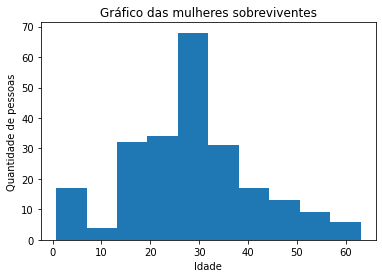

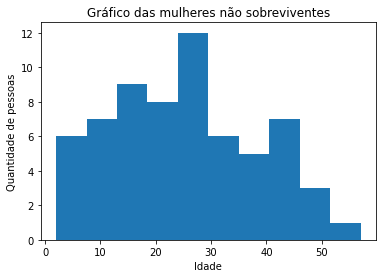

In [118]:
# Gráfico de mulheres sobrevivenes 
plt.subplot(1,1,1)
plt.hist(total_womans_survive['Age'])
plt.title('Gráfico das mulheres sobreviventes')
plt.xlabel('Idade')
plt.ylabel('Quantidade de pessoas')
plt.show()
plt.subplot(1,1,1)
plt.hist(total_womans_non_survive['Age'])
plt.title('Gráfico das mulheres não sobreviventes')
plt.xlabel('Idade')
plt.ylabel('Quantidade de pessoas')
plt.show()

<ipython-input-119-49db060c04e7>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,1,1)


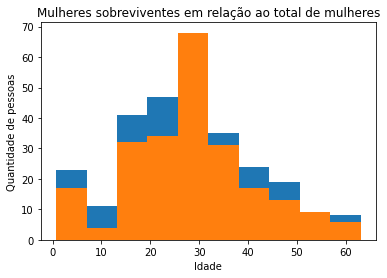

In [119]:
plt.subplot(1,1,1)
plt.subplot(1,1,1)
plt.hist(total_womans['Age'])
plt.hist(total_womans_survive['Age'])
plt.title('Mulheres sobreviventes em relação ao total de mulheres')
plt.xlabel('Idade')
plt.ylabel('Quantidade de pessoas')
plt.show()

<ipython-input-120-6e216fc64cfb>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,1,1)


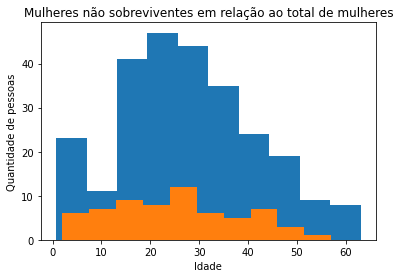

In [120]:
plt.subplot(1,1,1)
plt.subplot(1,1,1)
plt.hist(total_womans['Age'])
plt.hist(total_womans_non_survive['Age'])
plt.title('Mulheres não sobreviventes em relação ao total de mulheres')
plt.xlabel('Idade')
plt.ylabel('Quantidade de pessoas')
plt.show()

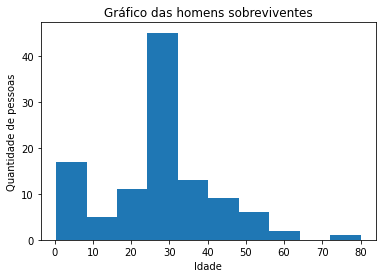

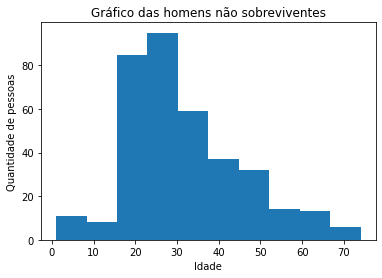

In [121]:
total_mens_survive = df_survive[df_survive['Sex']=='male']
plt.subplot(1,1,1)
plt.hist(total_mens_survive['Age'])
plt.title('Gráfico das homens sobreviventes')
plt.xlabel('Idade')
plt.ylabel('Quantidade de pessoas')
plt.show()
plt.subplot(1,1,1)
total_mens_non_survive = non_survive[non_survive['Sex']=='male']
plt.hist(total_mens_non_survive['Age'])
plt.title('Gráfico das homens não sobreviventes')
plt.xlabel('Idade')
plt.ylabel('Quantidade de pessoas')
plt.show()

<ipython-input-122-f5fd3b68a503>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,1,1)


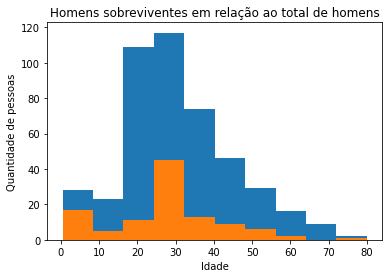

In [122]:
plt.subplot(1,1,1)
plt.subplot(1,1,1)
plt.hist(total_mens['Age'])
plt.hist(total_mens_survive['Age'])
plt.title('Homens sobreviventes em relação ao total de homens')
plt.xlabel('Idade')
plt.ylabel('Quantidade de pessoas')
plt.show()

<ipython-input-123-7eea25aa27a4>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,1,1)


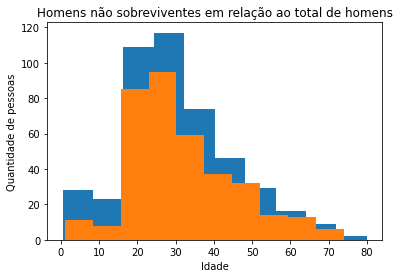

In [123]:
plt.subplot(1,1,1)
plt.subplot(1,1,1)
plt.hist(total_mens['Age'])
plt.hist(total_mens_non_survive['Age'])
plt.title('Homens não sobreviventes em relação ao total de homens')
plt.xlabel('Idade')
plt.ylabel('Quantidade de pessoas')
plt.show()

## Os gráficos comprovam nossa observação em relação a sobrevivência de mulheres e homens

## Conclusão 
## Os indivíduos que possuem mais chances de sobreviver possuem as seguintes características:
### Sexo: Feminino;
### Embarcaram : Southampton;
### Classe : 3;